First we import all neccesary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we import all functions from sklearn

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Next we load the iris dataset and set the axis

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

We set the data frame and use the target to contain integers while running the function on each element by having lambda convert each integer into its species.

In [5]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

We now set the dataset to show its dimensions, distributions and a preview of the records.

In [6]:
print("Dataset shape:", df.shape)
print(df['species'].value_counts())
print(df.head())

Dataset shape: (150, 6)
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


We now give the model training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=45, stratify=y
)

We train the ML to work with the classifier

In [8]:
clf = RandomForestClassifier(random_state=45)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Next we tell the model to make predictions

In [9]:
y_pred = clf.predict(X_test)

We tell the model to evaluate the predictions

In [10]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



We use the visualization of a confusion matrix to see where the predictive model was strong and where it was 'confused'

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


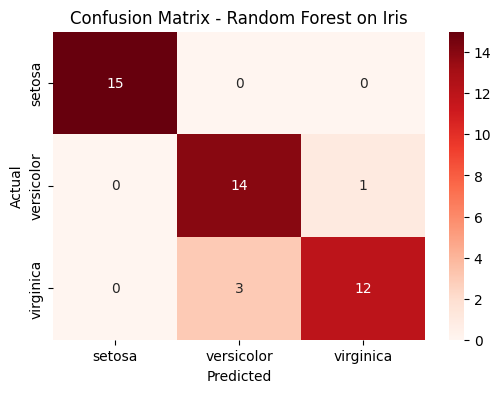

In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest on Iris")
plt.show()
